In [1]:
# Density-based Spatial Clustering of Application with Noise(DBSCAN)

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
data=pd.read_csv("/Users/hardik/Documents/Semester5/3. Data Mining/Mall_Customers_cluster.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [43]:
X=data.iloc[:,[3,4]]

In [44]:
from sklearn.cluster import DBSCAN

In [45]:
model=DBSCAN(eps=5, min_samples=4)
Y=model.fit_predict(X)
Y

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  4, -1,  2, -1,  4,  3,  2,  3,  2, -1,  2,  3,  4,
        3,  2,  3,  2,  3,  4, -1,  4,  3,  4, -1,  2,  5,  4,  5,  4,  5,
        2,  5,  4,  3,  2,  3,  2, -1,  4,  3,  4, -1, -1, -1, -1, -1, -1,
        6, -1,  6, -1,  6, -1,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [46]:
np.unique(Y)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [47]:
from sklearn.metrics import silhouette_score
silhouette_score(X,Y)

0.13799244650401032

In [48]:
#To find the sihouette score with different eps values

In [49]:
model=DBSCAN(eps=10, min_samples=4)
Y1=model.fit_predict(X)
silhouette_score(X,Y1)

0.39889488555584734

In [50]:
model=DBSCAN(eps=12, min_samples=4)
Y2=model.fit_predict(X)
silhouette_score(X,Y2)

0.3455936875612336

In [51]:
#To plot a graph

In [52]:
from sklearn.preprocessing import StandardScaler

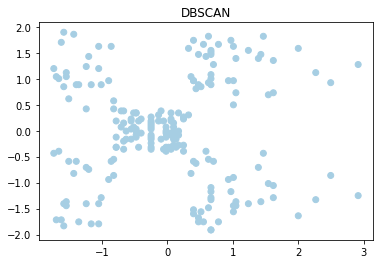

In [53]:
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")
    
dbscan(X, 10, 4)

In [54]:
#To plot a graph with Nearest neighbors

In [55]:
from sklearn.neighbors import NearestNeighbors
model=NearestNeighbors(n_neighbors=4).fit(X)

dis, ind=model.kneighbors(X)

In [56]:
dis=np.sort(dis, axis=0)

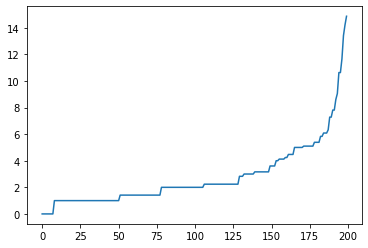

In [57]:
dis=dis[:,1]
plt.plot(dis)